In [3]:
pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 16.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 14.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/5 [scipy]
      Successfully uninstalled scipy-1.10.1━━━━━━━━━━━━━━━━━━━ 1/5 [scipy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [scikit-image] [scikit-image]
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure
from skimage.color import label2rgb
from skimage.measure import regionprops, label, perimeter
from scipy.spatial.distance import euclidean
import cv2
import math

def feret_diameter(region):
    coords = region.coords
    max_dist = 0
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            dist = euclidean(coords[i], coords[j])
            max_dist = max(max_dist, dist)
    return max_dist

def fractal_dimension(Z):
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)
        return len(np.where(S > 0)[0])
    Z = Z < 255
    p = min(Z.shape)
    n = 2**np.floor(np.log2(p)).astype(int)
    sizes = 2 ** np.arange(int(np.log2(n)), 1, -1)
    counts = [boxcount(Z, size) for size in sizes]
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

def lacunarity(image):
    image = image.astype(np.float32)
    mean = image.mean()
    if mean == 0:
        return 0
    return image.var() / (mean ** 2)

def extract_features_and_display(image_path):
    img = io.imread(image_path, as_gray=True)
    img = cv2.resize(img, (128, 128))  # Optional resizing
    thresh = filters.threshold_otsu(img)
    binary = img > thresh
    label_img = label(binary)
    props = regionprops(label_img)

    fig, ax = plt.subplots()
    ax.imshow(binary, cmap='gray')
    ax.set_title("Segmented Object")

    for region in props:
        if region.area < 50:
            continue  # skip small noise regions

        # Draw contour
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(rect)

        area = region.area
        filled_area = region.filled_area
        eq_diameter = region.equivalent_diameter
        max_feret = feret_diameter(region)
        ecc = region.eccentricity
        peri = perimeter(region.image)
        peri_surface_ratio = peri / filled_area if filled_area else 0
        sphericity = (4 * math.pi * area) / (peri ** 2) if peri else 0
        spherical_disprop = peri ** 2 / (4 * math.pi * area) if area else 0
        solidity = region.solidity
        major = region.major_axis_length
        minor = region.minor_axis_length
        elongation = major / minor if minor else 0
        fractal = fractal_dimension(binary)
        lacun = lacunarity(binary)

        # Show features
        print("\n--- Extracted Features ---")
        print(f"Area: {area}")
        print(f"Filled Area: {filled_area}")
        print(f"Equivalent Diameter: {eq_diameter:.2f}")
        print(f"Max Feret Diameter: {max_feret:.2f}")
        print(f"Eccentricity: {ecc:.2f}")
        print(f"Perimeter: {peri:.2f}")
        print(f"Perimeter-to-Surface Ratio: {peri_surface_ratio:.4f}")
        print(f"Sphericity: {sphericity:.4f}")
        print(f"Spherical Disproportion: {spherical_disprop:.4f}")
        print(f"Solidity: {solidity:.4f}")
        print(f"Major Axis Length: {major:.2f}")
        print(f"Minor Axis Length: {minor:.2f}")
        print(f"Elongation: {elongation:.2f}")
        print(f"Fractal Dimension: {fractal:.4f}")
        print(f"Lacunarity: {lacun:.4f}")

    plt.axis("off")
    plt.show()

def extract_features(image_path):
    img = io.imread(image_path, as_gray=True)
    img = cv2.resize(img, (128, 128))  # Optional resizing
    thresh = filters.threshold_otsu(img)
    binary = img > thresh
    label_img = label(binary)
    props = regionprops(label_img)

    fig, ax = plt.subplots()
    ax.imshow(binary, cmap='gray')
    ax.set_title("Segmented Object")

    for region in props:
        if region.area < 50:
            continue  # skip small noise regions

        # Draw contour
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(rect)

        area = region.area
        filled_area = region.filled_area
        eq_diameter = region.equivalent_diameter
        max_feret = feret_diameter(region)
        ecc = region.eccentricity
        peri = perimeter(region.image)
        peri_surface_ratio = peri / filled_area if filled_area else 0
        sphericity = (4 * math.pi * area) / (peri ** 2) if peri else 0
        spherical_disprop = peri ** 2 / (4 * math.pi * area) if area else 0
        solidity = region.solidity
        major = region.major_axis_length
        minor = region.minor_axis_length
        elongation = major / minor if minor else 0
        fractal = fractal_dimension(binary)
        lacun = lacunarity(binary)
        



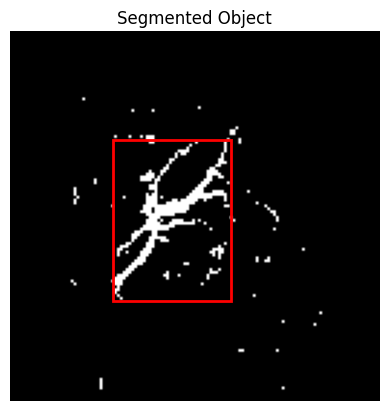

In [14]:
# Example usage
features = extract_features("test.tif")

features


--- Extracted Features ---
Area: 345.0
Filled Area: 347.0
Equivalent Diameter: 20.96
Max Feret Diameter: 66.29
Eccentricity: 0.92
Perimeter: 239.96
Perimeter-to-Surface Ratio: 0.6915
Sphericity: 0.0753
Spherical Disproportion: 13.2815
Solidity: 0.2926
Major Axis Length: 57.55
Minor Axis Length: 22.12
Elongation: 2.60
Fractal Dimension: 2.0000
Lacunarity: 35.7354


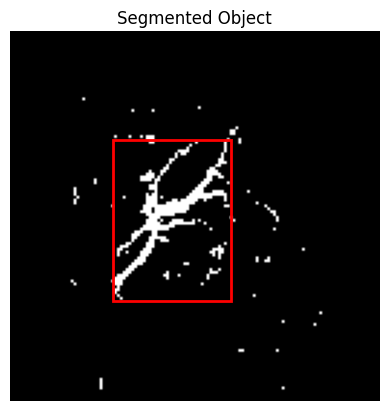

In [8]:
# Example usage
extract_features_and_display("test.tif")

In [12]:
print(features)

None
